<a href="https://colab.research.google.com/github/nanochiplab/MlpTraffic/blob/main/OdevTraffic_MLP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image

from keras.utils import load_img, img_to_array
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



In [6]:
#from google.colab import drive
#drive.mount('/content/drive')
!git clone https://github.com/MohamedNennouche/German-Traffic-Sign-Recognition
cur_path= "German-Traffic-Sign-Recognition/Train/"

Cloning into 'German-Traffic-Sign-Recognition'...
remote: Enumerating objects: 52027, done.
remote: Total 52027 (delta 0), reused 0 (delta 0), pack-reused 52027 (from 1)
Receiving objects: 100% (52027/52027), 300.65 MiB | 37.80 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (101736/101736), done.


In [7]:

#cur_path = "/content/drive/MyDrive/Mlp/Train"
data = []
labels = []
classes = 43

print("")
print("Görüntüler Yükleniyor...")

# Her sınıf için veri yükleme

for i in range(classes):
    path = os.path.join(cur_path,str(i))
    images = os.listdir(path)

    # Özyinelemeli olarak tüm dosyaları gez
    for root, dirs, files in os.walk(path):
        for file in files:
            try:
                image_path = os.path.join(root, file)

                # Görüntü dosyasını yükle ve işle
                image = Image.open(image_path)
                image = image.resize((30, 30))
                image = np.array(image)

                # Veri ve etiketleri ekle
                data.append([image, i])
            except Exception as e:
                print(f"Hata: Görüntü yüklenemedi. Dosya: {image_path}, Hata: {e}")

print(f"Toplam yüklenen görüntü sayısı: {len(data)}")

x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

#Converting lists into numpy arrays
x = np.array(x)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = X_train/255.0
X_test = X_test/255.0

print("")
print("")
print("Eğitim görüntlerinin şekli :", X_train.shape)
print("Etiketlerin şekli :", y_train.shape)



Görüntüler Yükleniyor...
Toplam yüklenen görüntü sayısı: 39209


Eğitim görüntlerinin şekli : (31367, 30, 30, 3)
Etiketlerin şekli : (31367,)


************************........:
Görüntüler Düzleştiriliyor........:
************************........:

************************........:
ÖĞRENME VE TEST YAPILIYOR........:
************************........:
Öğrenme oranı: 0.001, Doğruluk: 0.956516194848253
Öğrenme oranı: 0.01, Doğruluk: 0.5744707982657485
Öğrenme oranı: 0.1, Doğruluk: 0.05330272889568988
Öğrenme oranı: 1, Doğruluk: 0.04718184136699821
************************........:
MODEL değerlendirildi.......:
************************........:
Accuracy: 0.0472
Precision: 0.0022
Recall: 0.0472
F1-Score: 0.0043

Confusion Matrix yazılıyor.......:
************************........:
[[2 1]
 [1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


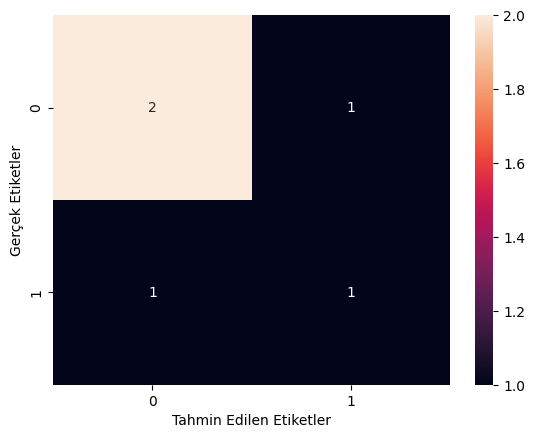

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

print("************************........:")
print("Görüntüler Düzleştiriliyor........:")
print("************************........:")
# Görüntüleri düzleştirme
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
print("")
print("************************........:")
print("ÖĞRENME VE TEST YAPILIYOR........:")
print("************************........:")
# MLPClassifier'ı oluşturma ve eğitme

learning_rates = [0.001, 0.01, 0.1, 1]
for lr in learning_rates:
       # MLPClassifier'ı oluşturuyoruz ve öğrenme oranını ayarlıyoruz [100,50] katman
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', max_iter=500,learning_rate_init=lr)
# Öğrenme oranını burada ayarlayacağız
#Modeli her öğrenme oranıyla eğitip ve değerlendireceğiz

    mlp.fit(X_train_flattened, y_train)
    y_pred = mlp.predict(X_test_flattened)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Öğrenme oranı: {lr}, Doğruluk: {accuracy}")
print("************************........:")
print("MODEL değerlendirildi.......:")
print("************************........:")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



# Gerçek etiketler (y_true) ve tahmin edilen etiketler (y_pred)
y_true = [0, 1, 0, 1, 0]  # Örnek gerçek etiketler
y_pred = [0, 0, 0, 1, 1]  # Örnek tahmin edilen etiketler

# Confusion Matrix'i hesaplayın
cm = confusion_matrix(y_true, y_pred)
print("")
print("Confusion Matrix yazılıyor.......:")
print("************************........:")

print(cm)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()


In [9]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

print(X_train.shape)
print(X_train_flattened.shape)
print(y_train.shape)
print("************************")

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
"""
# Hiperparametre ızgarası
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # Düzenleme parametresi
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300]
}
"""

param_grid = {
    'hidden_layer_sizes': [(100, 100)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.001],  # Düzenleme parametresi
    'learning_rate_init': [0.01],
    'max_iter': [200,200]
}

# MLP modelini oluşturma
mlp = MLPClassifier(random_state=42)

#**********************************************************************

# RandomizedSearchCV tanımlama
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Hiperparametre optimizasyonu
print("RandomizedSearchCV ile en iyi parametreler aranıyor...")
random_search.fit(X_train, y_train)

# En iyi parametreler ve en iyi skor
print(f"En iyi parametreler: {random_search.best_params_}")
print(f"En iyi doğruluk: {random_search.best_score_:.4f}")

#************************************************************
print("")
print("************************")

# GridSearchCV tanımlama
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Hiperparametre optimizasyonu
print("GridSearchCV ile en iyi parametreler aranıyor...")
grid_search.fit(X_train, y_train)

# En iyi parametreler ve en iyi skor
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi doğruluk: {grid_search.best_score_:.4f}")

#**********************************************************************

# En iyi modeli alma
best_model = grid_search.best_estimator_

# Test verisi üzerinde tahmin
y_pred = best_model.predict(X_test)

# Performans değerlendirmesi
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Doğruluğu: {accuracy:.4f}")
print("Sınıflandırma Raporu:")
print(report)



(31367, 30, 30, 3)
(31367, 2700)
(31367,)
************************
RandomizedSearchCV ile en iyi parametreler aranıyor...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


En iyi parametreler: {'solver': 'sgd', 'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 100), 'alpha': 0.001, 'activation': 'tanh'}
En iyi doğruluk: 0.9650

************************
GridSearchCV ile en iyi parametreler aranıyor...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
En iyi parametreler: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd'}
En iyi doğruluk: 0.9650
Test Doğruluğu: 0.9689
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      0.96      0.97       496
           2       0.96      0.97      0.96       450
           3       0.95      0.91      0.93       280
           4       0.98      0.95      0.97       418
           5       0.94      0.94      0.94       364
           6       0.95      1.00      0.98        59
           7       0.97     

In [ ]:
# Random bir görüntü ile test yapabiliriz..........
#from keras.models import load_model
#model = load_model('modelTrain.h5')
#model_path = "/content/drive/MyDrive/Mlp/modelTrain.h5"
#model = load_model(model_path)
#path = r'Test\00001.png'
#path = r'/content/drive/MyDrive/Mlp/Test/00001.png'


print("************************........:")
print("ÖRNEK KAYIT BULUNUYOR........:")
print("************************........:")
#img = image.load_img(path, target_size = (30,30)) #load the image
img = load_img(path, target_size = (30,30)) #load the image
#x = image.img_to_array(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

value = classes = np.argmax(model.predict(images,batch_size=32),axis=-1) #predict the label for the image

match classes[0]:
    case 0:
         print('Speed limit (20km/h)')

    case 1:
          print('Speed limit (30km/h)')

    case 2:
          print('Speed limit (50km/h)')

    case 3:
          print(' Speed limit (60km/h)')

    case 4:
          print('Speed limit (70km/h)')

    case 5:
          print('Speed limit (80km/h)')

    case 6:
          print('End of speed limit (80km/h)')

    case 7:
          print('Speed limit (100km/h)')

    case 8:
          print('Speed limit (120km/h)')

    case 9:
          print('No passing')

    case 10:
          print('No passing veh over 3.5 tons')

    case 11:
          print(', Right-of-way at intersection')

    case 12:
          print('Priority road')

    case 13:
          print('Yield')

    case 14:
          print('Stop')

    case 15:
          print('No vehicles')

    case 16:
          print('Veh > 3.5 tons prohibited')

    case 17:
          print('No entry')

    case 18:
          print('General caution')

    case 19:
          print('Dangerous curve left')

    case 20:
          print('Dangerous curve right')

    case 21:
          print('Double curve')

    case 22:
          print('Bumpy road')

    case 23:
          print('Slippery road')

    case 24:
          print('Road narrows on the right')

    case 25:
          print('Road work')

    case 26:
          print('Traffic signals')

    case 27:
          print('Pedestrians')

    case 28:
          print('Children crossing')

    case 29:
          print( 'Bicycles crossing')

    case 30:
          print('Beware of ice/snow')

    case 31:
          print('Wild animals crossing')

    case 32:
          print('End speed + passing limits')

    case 33:
          print('Turn right ahead')

    case 34:
          print('Turn left ahead')

    case 35:
          print('Ahead only')

    case 36:
          print('Go straight or right')

    case 37:
          print('Go straight or left')

    case 38:
          print('Keep right')

    case 39:
          print('Keep left')

    case 40:
          print('Roundabout mandatory')

    case 41:
          print('End of no passing')

    case _:
          print('End no passing veh > 3.5 tons')

************************........:
ÖRNEK KAYIT BULUNUYOR........:
************************........:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Speed limit (30km/h)
